# **Inteligencia Artificial y Aprendizaje Automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr Luis Eduardo Falcón Morales**
### **Tecnológico de Monterrey**
**Actividad Curvas ROC y PR**

# Javier Augusto Rebull Saucedo
# A01795838
# MNA

# **Itroducción**

La actividad se basa en los datos conocidos como "oil-spill" (derrame de petróleo).

El archivo de los datos está en Canvas y se llama "oil-spill.csv".


En la siguiente liga se encuentra la liga del artículo relacionado a dicha base de datos. Los datos incluyen 50 columnas y 937 registros. Las primeras 49 columnas son métricas obtenidas de imágenes satelitales del océano, en algunas de las cuales se tiene petróleo que fue derramado por alguna fuente desconocida. En el artículo se describe a detalle la manera en que se obtuvieron dichas columnas. Para la actividad es suficiente considerarlas como de valor numérico. La última columna es de valor 1 (hay derrame en esa sección de la imagen) o 0 (no hay derrame en esa sección de la imagen).

https://webdocs.cs.ualberta.ca/~holte/Publications/oilspill.pdf

En la siguiente liga puedes encontrar información de varias de las métricas que estaremos utilizando:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

La media geométrica se puede obtener combinando las métricas anteriores, pero para fines prácticos usaremos la de la librería llamada "imbalanced-learn":

https://glemaitre.github.io/imbalanced-learn/generated/imblearn.metrics.geometric_mean_score.html

In [1]:
# Incluye todas las librerías que consideres adecuadas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from numpy import mean, std


Para fines de la actividad procesaremos los datos de manera estándar para concentrarnos en los temas de la actividad.

In [3]:
path = '/content/sample_data/oil_spill.csv'
df = read_csv(path, header=None)   # no tienen nombre las columnas

print('Timensión del DataFrame',df.shape)

# eliminamos las siguientes columnas:
df.drop(22, axis=1, inplace=True)    # Esta columna tiene un solo valor constante.
df.drop(0, axis=1, inplace=True)     # Esta columna contiene información de secciones (batches) de las imágenes, que no la requerimos.

df.columns = [i for i in range(df.shape[1])]   # Renombramos las columnas para que sean enteros consecutivos.

# Particionamos los datos de entrada (X) y de salida (y):
X,y = df.iloc[:,:-1], df.iloc[:,-1]

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.12, stratify=y, shuffle=True, random_state=0)
Xtrain, Xval, ytrain, yval = train_test_split(Xtv, ytv, test_size=0.2, shuffle=True, random_state=5)
print('\nPartición:')
print('Train: Conteo clase positiva=%d, Porcentaje=%.2f%%' % (ytrain.sum(), 100*(ytrain.sum() / len(ytrain))))
print('Val: Conteo clase positiva=%d, Porcentaje=%.2f%%' % (yval.sum(), 100*(yval.sum() / len(yval))))
print('Test: Conteo clase positiva=%d, Porcentaje=%.2f%%' % (ytest.sum(), 100*(ytest.sum() / len(ytest))))

Timensión del DataFrame (937, 50)

Partición:
Train: Conteo clase positiva=29, Porcentaje=4.40%
Val: Conteo clase positiva=7, Porcentaje=4.24%
Test: Conteo clase positiva=5, Porcentaje=4.42%


Breve descripción numérica y gráfica del conjunto de entrenamiento:

In [4]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
0,659.0,344.153263,1.880555e+03,10.00,22.000,65.00,134.500,28526.00
1,659.0,709.286161,5.993162e+02,1.95,97.475,727.45,1242.135,1893.08
2,659.0,867.791608,5.145066e+02,1.00,445.065,791.35,1243.220,2674.16
3,659.0,85.078907,4.573682e+01,0.00,55.000,74.00,119.000,180.00
4,659.0,824339.418816,4.131627e+06,70312.00,127500.000,187500.00,348750.000,71315000.00
5,659.0,42.966449,1.259403e+01,21.24,33.430,39.64,51.975,82.64
6,659.0,9.162307,3.587007e+00,0.83,6.920,8.22,10.755,24.28
7,659.0,4119.098634,8.899523e+03,667.00,1404.750,2167.00,3600.000,160740.00
8,659.0,0.222898,8.984421e-02,0.02,0.170,0.21,0.260,0.74
9,659.0,110.288771,6.272348e+01,47.00,82.950,99.80,115.700,901.70


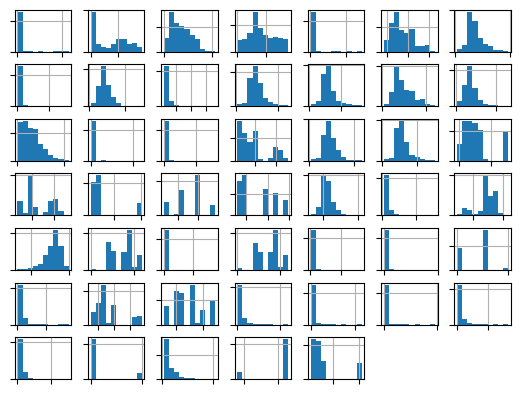

In [5]:
ax = Xtrain.hist()  # Histogramas:
# Quitemos toda la información del gráfico para visualizarlo de manera sencilla:
for axis in ax.flatten():
  axis.set_title('')
  axis.set_xticklabels([])
  axis.set_yticklabels([])
plt.show()

In [7]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 770 to 460
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       659 non-null    int64  
 1   1       659 non-null    float64
 2   2       659 non-null    float64
 3   3       659 non-null    int64  
 4   4       659 non-null    float64
 5   5       659 non-null    float64
 6   6       659 non-null    float64
 7   7       659 non-null    float64
 8   8       659 non-null    float64
 9   9       659 non-null    float64
 10  10      659 non-null    float64
 11  11      659 non-null    float64
 12  12      659 non-null    float64
 13  13      659 non-null    float64
 14  14      659 non-null    float64
 15  15      659 non-null    float64
 16  16      659 non-null    float64
 17  17      659 non-null    float64
 18  18      659 non-null    float64
 19  19      659 non-null    float64
 20  20      659 non-null    float64
 21  21      659 non-null    float64
 22  22   

In [8]:
# Código-1:
# Aplicamos la función Dummy:

def evaluate_model(X, y, model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  metric = make_scorer(geometric_mean_score)
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores


modeloD = DummyClassifier(strategy='uniform')
scores = evaluate_model(X, y, modeloD)

print('Métrica G-mean - Media Geométrica: %.3f (%.3f)' % (mean(scores), std(scores)))

Métrica G-mean - Media Geométrica: 0.486 (0.153)


# **Ejercicio-1**

### **Explica lo que hace cada línea de código de la celda anterior llamada "Código-1", así como lo que significa el valor que se obtiene en su salida:**

**+++++++++++ Inicia sección para agregar texto ++++++++++++++++**



# 1. Linea
```
def evaluate_model(X, y, model):
```
La función evaluate_model se define para evaluar un modelo utilizando validación cruzada. Esta función acepta tres parámetros: los datos de entrada X, las etiquetas y, y el modelo a evaluar, simplemente denominado model.

# 2. Linea
```
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
```


Se utiliza RepeatedStratifiedKFold como método de validación cruzada.

Dividir los datos en 10 partes, o "folds".
Este proceso de división se repite tres veces.
Se fija una semilla aleatoria en 1 para asegurar que los resultados sean consistentes cada vez que se ejecuta.
La estratificación garantiza que cada fold mantenga la misma proporción de clases que el conjunto de datos original.


# 3.   Linea
```
  metric = make_scorer(geometric_mean_score)
```
**make_scorer(geometric_mean_score):** Crea un objeto de tipo “scorer” utilizando la función geometric_mean_score (media geométrica), que es una métrica que se utiliza comúnmente para evaluar modelos en conjuntos de datos desbalanceados. Esta métrica mide el balance entre precisión y sensibilidad para evitar que las clases desbalanceadas dominen el resultado.



# 4.   Linea
```
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
```

cross_val_score: Ejecuta la validación cruzada con el modelo y los datos proporcionados:

*   **model:** El modelo que se va a evaluar.
*   **X, y:** Los datos de entrada y las etiquetas.
*   **scoring=metric:** Usa la métrica definida anteriormente (geometric_mean_score).
*   **cv=cv:** El esquema de validación cruzada, en este caso, el RepeatedStratifiedKFold definido antes.
*   **n_jobs=-1:** Utiliza todos los núcleos disponibles del procesador para paralelizar el cálculo, acelerando el proceso.


# 5.   Linea
```
  return scores
```
Devuelve los scores: La función retorna los puntajes obtenidos de la validación cruzada, es decir, la media geométrica para cada una de las iteraciones de la validación cruzada.

# 6.   Linea
```
modeloD = DummyClassifier(strategy='uniform')
```

DummyClassifier(strategy='uniform'): Se crea un modelo “dummy” que asigna clases aleatoriamente de manera uniforme. Es decir, todas las clases tienen la misma probabilidad de ser seleccionadas, lo que sirve como un modelo base o comparativo.

# 7.   Linea
```
scores = evaluate_model(X, y, modeloD)
```

Llama a la función evaluate_model: Se llama a la función que evalúa el modelo dummy modeloD con los datos X (entrada) e y (etiquetas). El resultado es un conjunto de puntajes (scores) que representan el rendimiento del modelo en términos de la métrica G-mean.

# 8.   Linea
```
print('Métrica G-mean - Media Geométrica: %.3f (%.3f)' % (mean(scores), std(scores)))
```

Imprime el resultado: Se imprime el valor promedio (mean(scores)) de los puntajes obtenidos en la validación cruzada y la desviación estándar (std(scores)). El formato %.3f asegura que se muestren solo tres decimales.

# 9.   Significado del valor de salida:
```
Métrica G-mean - Media Geométrica: 0.4XX (0.1XX)
```

**Descripción de la evaluación del modelo mediante la métrica G-mean**

El resultado "0.4XX (0.1XX)" se refiere a la evaluación del modelo mediante la métrica G-mean (media geométrica), que es útil para conjuntos de datos desbalanceados. Esta métrica mide el equilibrio entre la sensibilidad y la especificidad del modelo.

**Desglose del resultado:**

- Valor principal: 0.4XX
  - Representa la media geométrica promedio obtenida a través de la validación cruzada.
  - Indica un desempeño moderado del modelo, pero lejos del óptimo (1.0 sería perfecto).
  - Sugiere que el modelo está apenas por encima de una predicción aleatoria, lo cual es esperado para un modelo Dummy.

- Desviación estándar: 0.1XX
  - Indica la variabilidad de los puntajes en las diferentes particiones de la validación cruzada.
  - Una desviación significativa sugiere que el rendimiento del modelo varió bastante entre las diferentes particiones del conjunto de datos.

**Interpretación general:**

El valor de 0.4XX muestra que el modelo tiene un rendimiento pobre, como es de esperar de un modelo Dummy que asigna clases de manera aleatoria. La desviación estándar de 0.1XX sugiere una variación notable en el rendimiento del modelo dependiendo del subconjunto de datos evaluado. Este resultado sirve como punto de comparación para modelos más sofisticados, que deberían mejorar significativamente esta métrica para ser considerados útiles en la tarea de clasificación.


# Referencias:
### - Fernández, A., García, S., Galar, M., Prati, R. C., Krawczyk, B., & Herrera, F. (2018). Learning from Imbalanced Data Sets. Springer.
### - Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf
### - Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.
### - Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

**+++++++++++ Termina sección para agregar texto ++++++++++++++**

Para fines de esta actividad definimos las siguientes transformaciones del preprocesamiento de los datos:

In [ ]:
# Transforamaciones numéricas:

numericas_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='mean')),
                                       ('std_transformer', StandardScaler())])
numericas_pipeline_nombres = Xtrain.columns

columnasTransformer = ColumnTransformer(transformers = [('num', numericas_pipeline, numericas_pipeline_nombres)],
                                        remainder='passthrough')

In [ ]:
mi_metrica = make_scorer(geometric_mean_score)  # definimos la métrica G-mean

In [ ]:
# Código-2:
# ACCURACY & G-mean

def mis_modelos1():
  modelos, nombres = list(), list()

  modelos.append(LogisticRegression(penalty=None,
                                    max_iter=2000,
                                    random_state=1))
  nombres.append('LR')


  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear',
                                    max_iter=2000,
                                    random_state=1))
  nombres.append('LASSO')


  modelos.append(LogisticRegression(penalty='l2',
                                    max_iter=2000,
                                    random_state=1))
  nombres.append('RIDGE')

  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5,
                                    solver='saga',
                                    max_iter=5000,
                                    random_state=1))
  nombres.append('EN')

  modelos.append(KNeighborsClassifier(n_neighbors=5))
  nombres.append('kNN')

  return modelos, nombres

# +++++++++++++++++++++++++++++++


modelos, nombres = mis_modelos1()
resultados1, resultados2 = list(), list()
print('Resultados de Validación:')

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  scores = cross_validate(pipeline,
                          Xtv,
                          np.ravel(ytv),
                          scoring={'exactitud':'accuracy', 'm_geo':mi_metrica},
                          cv=cv1)

  resultados1.append(scores['test_exactitud'])
  resultados2.append(scores['test_m_geo'])

  print(nombres[i])
  print('Exactitud: >> %.3f (%.3f)' % (np.nanmean(scores['test_exactitud']), np.nanstd(scores['test_exactitud'])))
  print('G-mean: >> %.3f (%.3f)' % (np.nanmean(scores['test_m_geo']), np.nanstd(scores['test_m_geo'])))
  print()

plt.boxplot(resultados1, labels=nombres,  showmeans=True)
plt.title("Exactitud - Accuracy")
plt.show()

plt.boxplot(resultados2, labels=nombres,  showmeans=True)
plt.title("G-Mean")
plt.show()


# **Ejercicio-2**

### **Explica por qué la salida y gráficos anteriores nos ayudan a respaldar la decisión de usar la métrica G-mean, en lugar de la exactitud (accuracy) en este problema:**

**+++++++++++ Inicia sección para agregar texto ++++++++++++++++**



None




**+++++++++++ Termina sección para agregar texto ++++++++++++++**

# **Ejercicio-3**

### **Utilizando en adelante solamente la métrica G-mean y de manera análoga al código de la celda llamada "Código-2" anterior, define una función llamada "mis_modelos2()" y utilízala para definir los mismos modelos de regresión logística, pero incluyendo el argumento class_weight='balanced'. Los demás hiperparámetros los puedes variar si así lo consideras adecuado. Incluye kNN, aunque no tiene argumento para balanceo de las clases de salida.**

In [ ]:
#  Casos balancedos con hiperparámetro de Regresión Logística:

# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

def mis_modelos2():



   None



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


plt.boxplot(resultados2, labels=nombres2,  showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.title("G-mean : Modelos Balanceados")
plt.show()

# **Ejercicio-4**

### **4a) Selecciona el que consideres sea el mejor modelo encontrado hasta ahora y utilízalo para obtener los gráficos curva-ROC y curva-PR, así como los valores de sus áreas bajo la curva. Sigue utilizando los conjuntos de entrenamiento y validación.**



In [ ]:
# **+++++++++++ Inicia sección para agregar código ++++++++++++++++**
# NOTA: puedes agregar todas las celdas que consideres adecuado.



None




# **+++++++++++ Termina sección para agregar código ++++++++++++++**

### **4b) Incluye tus conclusiones de los gráficos obtenidos en el inciso anterior.**

**+++++++++++ Inicia sección para agregar texto ++++++++++++++++**



None




**+++++++++++ Termina sección para agregar texto ++++++++++++++**

# **Ejercicio-5**

### **Utiliza el conjunto de prueba (test) para evaluar el mejor modelo obtenido.**

In [ ]:
# **+++++++++++ Inicia sección para agregar código ++++++++++++++++**
# NOTA: puedes agregar todas las celdas que consideres adecuado.



None




# **+++++++++++ Termina sección para agregar código ++++++++++++++**

# **Ejercicio-6**

### **Incluye tus conclusiones finales de los resultados obtenidos y de la actividad en general.**

**+++++++++++ Inicia sección para agregar texto ++++++++++++++++**



None




**+++++++++++ Termina sección para agregar texto ++++++++++++++**

## **<<< Fin de la Actividad de la Semana - curvas ROC y PR >>>**